### Check and draw diagram using Single Dice (Probability Distribution)

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Make a list and fill random dice value
list = []
#random.seed(42)
for i in range(10000):
    list.append(random.randint(1, 6))

In [3]:
# first first 4 element
list[:5]

[4, 3, 1, 1, 1]

In [4]:
value_count = pd.Series(list).value_counts()
s = (value_count / value_count.sum()).sort_index()
s

1    0.1698
2    0.1627
3    0.1642
4    0.1708
5    0.1649
6    0.1676
Name: count, dtype: float64

<Axes: >

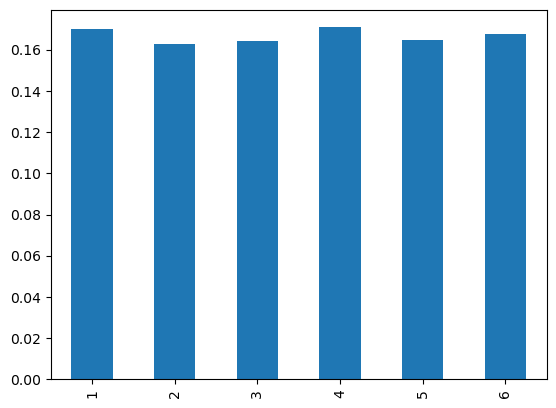

In [5]:
# Plot bar chart
s.plot(kind='bar')

### Check and draw diagram using 2 Dice (Probability Distribution)

In [6]:
multiple_dice_list = []
for i in range(10000):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    multiple_dice_list.append(a + b)

In [7]:
multiple_dice_list[:5]

[4, 7, 9, 4, 9]

In [8]:
value_counts = pd.Series(multiple_dice_list).value_counts()
series = (value_counts / value_counts.sum()).sort_index()

In [9]:
np.cumsum(s) #Calculating CDF

1    0.1698
2    0.3325
3    0.4967
4    0.6675
5    0.8324
6    1.0000
Name: count, dtype: float64

<Axes: >

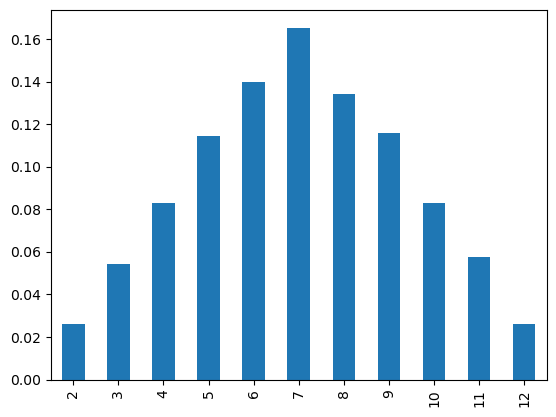

In [10]:
series.plot(kind = 'bar')

<Axes: >

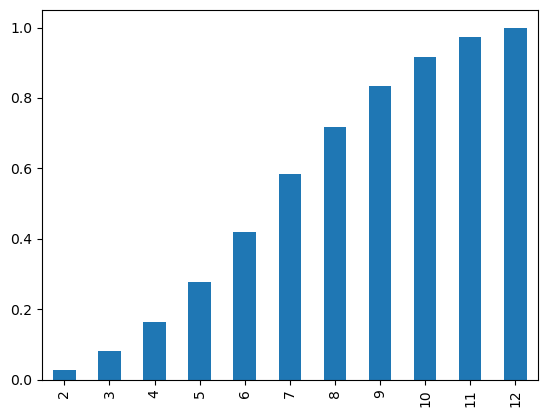

In [11]:
np.cumsum(series).plot(kind='bar')

### Parametric Dendity Estimation(PDF)

In [12]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [13]:
# Get random 1000 records with mean 50 and scale 5
sample = normal(loc=50, scale=5, size=1000)

In [14]:
sample.mean()

np.float64(50.02013635235207)

(array([  3.,  12.,  39., 139., 219., 276., 174., 101.,  33.,   4.]),
 array([31.76200725, 35.19386356, 38.62571986, 42.05757617, 45.48943247,
        48.92128878, 52.35314508, 55.78500139, 59.21685769, 62.648714  ,
        66.0805703 ]),
 <BarContainer object of 10 artists>)

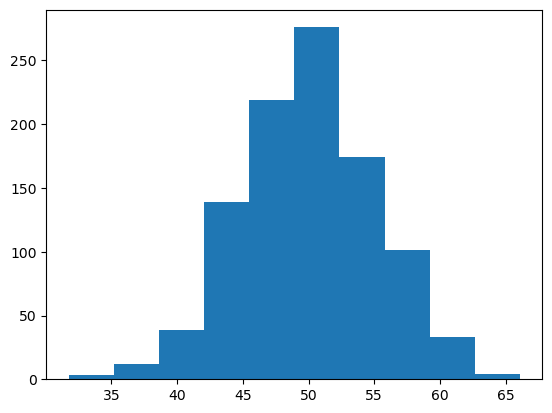

In [15]:
# histogram plaot to understand distribution of data
plt.hist(sample, bins=10)

In [16]:
sample_mean = sample.mean()
sample_std_div = sample.std()

In [17]:
sample_mean, sample_std_div

(np.float64(50.02013635235207), np.float64(5.096369594867599))

In [18]:
#fit the distribution with above calculated mean and std_div
from scipy.stats import norm

dist = norm(60, 12)

In [19]:
values = np.linspace(sample.min(), sample.max(), 100)

In [20]:
sample.max(), sample.min()

(np.float64(66.08057030376743), np.float64(31.76200725099268))

In [21]:
probabilities = [dist.pdf(value) for value in values]

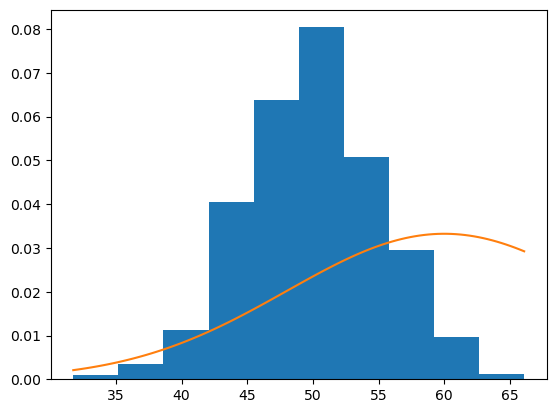

In [22]:
#Plt the histogram and PDf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

In [ ]:
# We can get the same result with seaborn without calculating above stuff ourself
import seaborn as sns
sns.distplot(sample)